In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/drive/MyDrive/pre/data.csv")

In [9]:
data

,Unnamed: 0,Pixel_ID,Timestep,Date,NDVI,Rainfall,Temperature
0,0,0,1,2018-10-17,0.258371,6.2,17.0
1,1,0,2,2018-10-22,0.258371,3.2,17.6
2,2,0,3,2018-10-27,0.265058,0.4,16.8
3,3,0,4,2018-11-01,0.384334,5.2,10.6
4,4,0,5,2018-11-06,0.376317,4.0,13.6
...,...,...,...,...,...,...,...
202795,714235,23807,26,2018-10-08,0.639712,1.4,2.6
202796,714236,23807,27,2018-10-13,0.714394,0.6,9.6
202797,714237,23807,28,2018-10-18,0.759236,0.4,10.0
202798,714238,23807,29,2018-10-23,0.774192,1.2,4.0


In [63]:
# statitics of the datasets
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,202800.0,334268.153846,209779.079972,0.000000,155969.75000,260669.500000,506744.250000,714239.000000
Pixel_ID,202800.0,11141.788462,6992.635993,0.000000,5198.75000,8688.500000,16890.750000,23807.000000
Timestep,202800.0,15.500000,8.655463,1.000000,8.00000,15.500000,23.000000,30.000000
NDVI,202800.0,0.481913,0.226883,-0.990237,0.28943,0.472532,0.668168,0.999544
Rainfall,202800.0,0.969940,1.936655,0.000000,0.00000,0.000000,1.200000,61.000000
Temperature,202800.0,18.816846,6.144351,-10.200000,13.80000,19.800000,23.800000,33.000000


# 1. Split and normalize the data

In [4]:
#Split the data in 70% training, 20% validation and 10% testing
from sklearn.model_selection import train_test_split

# Find the pixel ID indices for splitting
pixel_ids = data['Pixel_ID'].unique()
split_idx_1 = int(0.7 * len(pixel_ids))
split_idx_2 = int(0.9 * len(pixel_ids))
train_pixel_ids = pixel_ids[:split_idx_1]
val_pixel_ids = pixel_ids[split_idx_1:split_idx_2]
test_pixel_ids = pixel_ids[split_idx_2:]

# Split the data based on the pixel ID ranges
train = data.loc[data['Pixel_ID'].isin(train_pixel_ids)]
val = data.loc[data['Pixel_ID'].isin(val_pixel_ids)]
test = data.loc[data['Pixel_ID'].isin(test_pixel_ids)]

In [5]:
from sklearn.preprocessing import RobustScaler

# Create the RobustScaler
scaler = RobustScaler()

# Fit the scaler on the training data and transform it
ndvi_rain_temp_train = train[['NDVI', 'Rainfall', 'Temperature']].copy()
ndvi_rain_temp_train_scaled = scaler.fit_transform(ndvi_rain_temp_train)
train_scaled = pd.concat([train, pd.DataFrame(ndvi_rain_temp_train_scaled, columns=['NDVI_scaled', 'Rainfall_scaled', 'Temperature_scaled'], index=ndvi_rain_temp_train.index)], axis=1)

# Transform the validation data using the same scaler
ndvi_rain_temp_val = val[['NDVI', 'Rainfall', 'Temperature']].copy()
ndvi_rain_temp_val_scaled = scaler.transform(ndvi_rain_temp_val)
val_scaled = pd.concat([val, pd.DataFrame(ndvi_rain_temp_val_scaled, columns=['NDVI_scaled', 'Rainfall_scaled', 'Temperature_scaled'], index=ndvi_rain_temp_val.index)], axis=1)

# Transform the testing data using the same scaler
ndvi_rain_temp_test = test[['NDVI', 'Rainfall', 'Temperature']].copy()
ndvi_rain_temp_test_scaled = scaler.transform(ndvi_rain_temp_test)
test_scaled = pd.concat([test, pd.DataFrame(ndvi_rain_temp_test_scaled, columns=['NDVI_scaled', 'Rainfall_scaled', 'Temperature_scaled'], index=ndvi_rain_temp_test.index)], axis=1)


In [66]:
train_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,141960.0,214719.542265,111140.967222,0.000000,119099.750000,212369.500000,266999.250000,457349.000000
Pixel_ID,141960.0,7156.834742,3704.698896,0.000000,3969.750000,7078.500000,8899.250000,15244.000000
Timestep,141960.0,15.500000,8.655472,1.000000,8.000000,15.500000,23.000000,30.000000
NDVI,141960.0,0.437898,0.210603,-0.981137,0.262039,0.415546,0.603186,0.999029
Rainfall,141960.0,0.896624,1.910429,0.000000,0.000000,0.000000,1.000000,61.000000
Temperature,141960.0,18.408594,6.376788,-4.800000,13.000000,19.200000,23.800000,32.600000
NDVI_scaled,141960.0,0.065518,0.617337,-4.094080,-0.449975,0.000000,0.550025,1.710354
Rainfall_scaled,141960.0,0.896624,1.910429,0.000000,0.000000,0.000000,1.000000,61.000000
Temperature_scaled,141960.0,-0.073278,0.590443,-2.222222,-0.574074,0.000000,0.425926,1.240741


In [ ]:
test_scaled.head(10)

In [67]:
# Get statistics for the NDVI column
ndvi_stats = train_scaled['NDVI_scaled'].describe()

# Print the statistics
print(ndvi_stats)

count    141960.000000
mean          0.065518
std           0.617337
min          -4.094080
25%          -0.449975
50%           0.000000
75%           0.550025
max           1.710354
Name: NDVI_scaled, dtype: float64


In [68]:
# Check for NaN values in the scaled input features
has_nan = train_scaled.isna().any().any()
print("NaN values in the scaled input features:", has_nan)

NaN values in the scaled input features: False


# 2. Build data structure for train the model

In [6]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l1,l2
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import backend as K
import joblib
from keras.models import load_model


In [7]:
# Select input and output variables
input_vars = ['NDVI_scaled', 'Rainfall_scaled', 'Temperature_scaled']
output_var = 'NDVI_scaled'

# Define window size for input sequences
window_size = 20

In [8]:
# Create sequences of input and output for training data
X_train = []
y_train = []
for pixel_id in train_scaled['Pixel_ID'].unique():
    pixel_data = train_scaled[train_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_train.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_train.append(pixel_data.loc[i, output_var])

# Create sequences of input and output for validation data
X_val = []
y_val = []
for pixel_id in val_scaled['Pixel_ID'].unique():
    pixel_data = val_scaled[val_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_val.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_val.append(pixel_data.loc[i, output_var])

# Create sequences of input and output for testing data
X_test = []
y_test = []
for pixel_id in test_scaled['Pixel_ID'].unique():
    pixel_data = test_scaled[test_scaled['Pixel_ID'] == pixel_id].reset_index(drop=True)
    for i in range(window_size, pixel_data.shape[0]):
        X_test.append(pixel_data.loc[i-window_size:i-1, input_vars].values)
        y_test.append(pixel_data.loc[i, output_var])

# Convert X and y to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [ ]:
# df_X_test = pd.DataFrame(X_test.reshape(X_test.shape[0], -1))
# df_y_test = pd.DataFrame(y_test.reshape(y_test.shape[0], -1))
# df_y_test

In [19]:
y_test.shape

(6760,)

## 2.1 Random forest model

In [10]:
# Train the Random Forest model with increased n_estimators and max_depth
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train.reshape((X_train.shape[0], -1)), y_train)


RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)

In [11]:
# Evaluate the model on the test set
rf_test_flat = X_test.reshape(X_test.shape[0], -1)

rf_mse = mean_squared_error(y_test, rf_model.predict(rf_test_flat))
print("Random forest MSE:", rf_mse)

Random forest MSE: 0.0468067134967187


In [12]:
# Create file to save models
model_save_path = "/content/drive/MyDrive/Saved_models/rf_model.pkl"

In [13]:
# Save the model
joblib.dump(rf_model, model_save_path)

['/content/drive/MyDrive/Saved_models/rf_model.pkl']

In [14]:
# Load rf model
rf_model = joblib.load(model_save_path)

In [15]:
# Predict the NDVI values using the Random Forest model
rf_pred_test = rf_model.predict(X_test.reshape((X_test.shape[0], -1)))

# Inverse transform the predicted NDVI values
rf_inverse_y_pred_test = scaler.inverse_transform(np.hstack([rf_pred_test.reshape(-1, 1), np.zeros((rf_pred_test.shape[0], 2))]))[:, 0]

# Check the inverse transformed values
print(rf_inverse_y_pred_test)
rf_inverse_y_pred_test_df = pd.DataFrame(rf_inverse_y_pred_test)
rf_inverse_y_pred_test_df.describe().transpose()

[0.59372078 0.59538923 0.59872963 ... 0.70500515 0.74859924 0.76764617]


,count,mean,std,min,25%,50%,75%,max
0,6760.0,0.549616,0.210764,0.112768,0.357239,0.568166,0.751948,0.89896


## 2.2 LSTM mdoel

In [82]:
from keras.callbacks import EarlyStopping
from keras.regularizers import L1L2

# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(window_size, len(input_vars)), activation='tanh', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
lstm_model.add(Dense(1))
lstm_model.compile(loss="MSE", optimizer='adam')

# Set up early stopping callback with increased patience
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [83]:
# Train the model
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=50,  
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/50
1479/1479 [==============================] - 8s 4ms/step - loss: 0.1155 - val_loss: 0.1497
Epoch 2/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.0623 - val_loss: 0.1500
Epoch 3/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.0595 - val_loss: 0.1512
Epoch 4/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.0583 - val_loss: 0.1494
Epoch 5/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.0567 - val_loss: 0.1473
Epoch 6/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.0560 - val_loss: 0.1477
Epoch 7/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.0553 - val_loss: 0.1485
Epoch 8/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.0549 - val_loss: 0.1484
Epoch 9/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.0544 - val_loss: 0.1462
Epoch 10/50
1479/1479 [==============================] - 6s 4ms/step - loss: 0.053

In [84]:
# Evaluate the model on the test set
lstm_mse = mean_squared_error(y_test, lstm_model.predict(X_test))
print("LSTM MSE:", lstm_mse)

212/212 [==============================] - 1s 2ms/step
LSTM MSE: 0.04542430546829162


In [85]:
# save model
model_save_path = "/content/drive/MyDrive/Saved_models/lstm_model"

In [86]:
lstm_model.save(model_save_path)

In [87]:
# Load lstm model
lstm_model = load_model(model_save_path)

In [31]:
# Predict the NDVI values using the Random Forest model
lstm_pred_test = lstm_model.predict(X_test)

# Inverse transform the predicted NDVI values
lstm_inverse_y_pred_test = scaler.inverse_transform(np.hstack([lstm_pred_test.reshape(-1, 1), np.zeros((lstm_pred_test.shape[0], 2))]))[:, 0]

# Check the inverse transformed values
print(lstm_inverse_y_pred_test)
lstm_inverse_y_pred_test_df = pd.DataFrame(lstm_inverse_y_pred_test)
lstm_inverse_y_pred_test_df.describe().transpose()

212/212 [==============================] - 1s 2ms/step
[0.39659566 0.39846961 0.40017798 ... 0.46935648 0.46673673 0.47246407]


,count,mean,std,min,25%,50%,75%,max
0,6760.0,0.407574,0.019784,0.363325,0.393404,0.405029,0.420743,0.506536


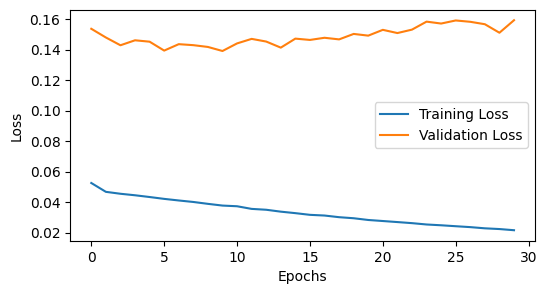

In [32]:
# Plot training and validation loss for LSTM
plt.figure(figsize=(6, 3))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 2.3 convLSTM

In [61]:
# convLSTM
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.layers import Flatten

# Define the model architecture
convlstm_model = Sequential()
convlstm_model.add(ConvLSTM2D(filters=32, kernel_size=(3,3), input_shape=(window_size, 1, 1, len(input_vars)), padding='same', return_sequences=True))
convlstm_model.add(Dropout(0.2))
convlstm_model.add(ConvLSTM2D(filters=16, kernel_size=(3,3), padding='same', return_sequences=False))
convlstm_model.add(Dropout(0.2))
convlstm_model.add(Flatten())
convlstm_model.add(Dense(1))

convlstm_model.compile(loss='mse', optimizer='adam')

In [62]:
# Reshape the input data to match ConvLSTM2D's input shape: (samples, time_steps, height, width, channels)
X_train_reshaped = X_train.reshape((X_train.shape[0], window_size, 1, 1, len(input_vars)))
X_val_reshaped = X_val.reshape((X_val.shape[0], window_size, 1, 1, len(input_vars)))
X_test_reshaped = X_test.reshape((X_test.shape[0], window_size, 1, 1, len(input_vars)))

# Set up early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
convlstm_history = convlstm_model.fit(X_train_reshaped, y_train, epochs=30, validation_data=(X_val_reshaped, y_val), callbacks=[early_stop])

In [68]:
# Evaluate the model on the test set
convlstm_mse = mean_squared_error(y_test, convlstm_model.predict(X_test_reshaped))
print("convLSTM Mean Squared Error:", convlstm_mse)

212/212 [==============================] - 5s 21ms/step
convLSTM Mean Squared Error: 0.04375664881044558


In [69]:
model_save_path = "/content/drive/MyDrive/Saved_models/convlstm_model"

In [70]:
# save model
convlstm_model.save(model_save_path)

In [71]:
# Load convlstm model
convlstm_model = load_model(model_save_path)

## 2.4 Transformer

In [ ]:
pip install tensorflow

In [72]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import LayerNormalization, MultiHeadAttention, TimeDistributed
from tensorflow.keras.layers import Conv1D, Conv2D, GlobalMaxPooling1D, Concatenate
from tensorflow.keras.layers import GlobalAveragePooling1D, AveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def create_transformer_model(num_input_features, num_output_features, max_sequence_length, d_model=64, num_heads=4, ff_dim=128):
    inputs = Input(shape=(max_sequence_length, num_input_features))
    
    attn_layer = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
    attn_output = attn_layer(inputs, inputs)
    attn_output = Dropout(0.2)(attn_output)
    attn_output = LayerNormalization(epsilon=1e-6)(inputs + attn_output)
    
    ff_output = TimeDistributed(Dense(ff_dim, activation='ReLU'))(attn_output)
    ff_output = TimeDistributed(Dropout(0.2))(ff_output)
    ff_output = TimeDistributed(Dense(num_output_features))(ff_output)
    ff_output = GlobalMaxPooling1D()(ff_output)
    
    outputs = Dense(num_output_features, activation='tanh')(ff_output)
    
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# Define the transformer model architecture
transformer_model = create_transformer_model(num_input_features=len(input_vars), num_output_features=1, max_sequence_length=window_size)

# Compile the model
transformer_model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.01))

# Learning rate scheduling
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


In [ ]:
# Train the model
transformer_history = transformer_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[lr_schedule, tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

In [80]:
# Evaluate the model on the test set
transformer_mse = mean_squared_error(y_test, transformer_model.predict(X_test))
print("Transformer Mean Squared Error:", transformer_mse)

212/212 [==============================] - 0s 2ms/step
Transformer Mean Squared Error: 0.17216946374282918


In [75]:
model_save_path = "/content/drive/MyDrive/Saved_models/transformer_model"

In [76]:
# save model
transformer_model.save(model_save_path)

In [77]:
# Load convlstm model
transformer_model = load_model(model_save_path)

# 3. Compare the model performance

In [88]:
# predicted NDVI values for rf, LSTM,convLSTM,transformer model
#test
rf_pred_test = rf_model.predict(X_test.reshape((X_test.shape[0], -1)))
lstm_pred_test = lstm_model.predict(X_test)
convlstm_pred_test = convlstm_model.predict(X_test_reshaped)
transformer_pred_test = transformer_model.predict(X_test)

#val
rf_pred_val = rf_model.predict(X_val.reshape((X_val.shape[0], -1)))
lstm_pred_val = lstm_model.predict(X_val)
convlstm_pred_val = convlstm_model.predict(X_val_reshaped)
transformer_pred_val = transformer_model.predict(X_val)

423/423 [==============================] - 1s 2ms/step


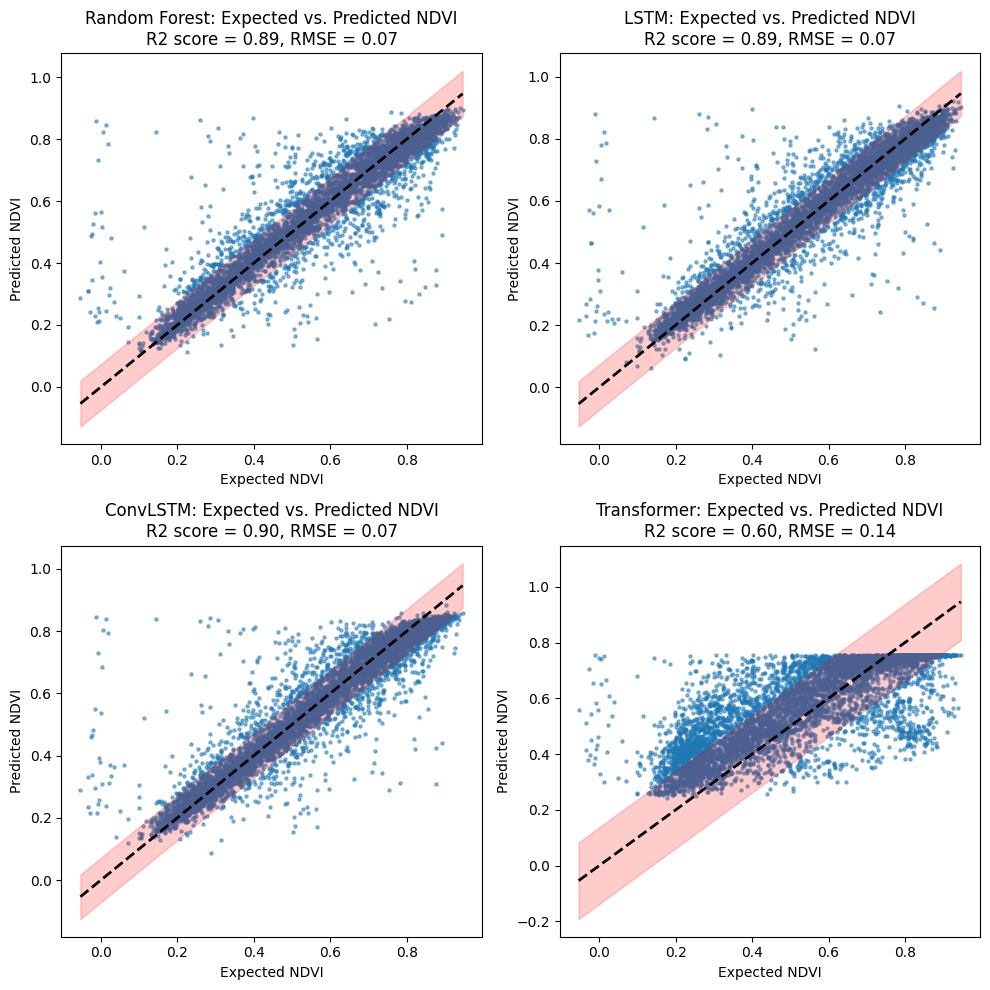

In [89]:
# Compare the model performance by scatter plot of predicted and expected NDVI

# Inverse transform the true NDVI values for the test set
inverse_y_test = scaler.inverse_transform(np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 2))]))[:, 0]

# Inverse transform the predicted NDVI values for 4 models
rf_inverse_y_pred_test = scaler.inverse_transform(np.hstack([rf_pred_test.reshape(-1, 1), np.zeros((rf_pred_test.shape[0], 2))]))[:, 0]
lstm_inverse_y_pred_test = scaler.inverse_transform(np.hstack([lstm_pred_test, np.zeros((lstm_pred_test.shape[0], 2))]))[:, 0]
convlstm_inverse_y_pred_test = scaler.inverse_transform(np.hstack([convlstm_pred_test, np.zeros((convlstm_pred_test.shape[0], 2))]))[:, 0]
transformer_inverse_y_pred_test = scaler.inverse_transform(np.hstack([transformer_pred_test, np.zeros((transformer_pred_test.shape[0], 2))]))[:, 0]

# Calculate R2 scores for the test set
r2_rf_test = r2_score(inverse_y_test, rf_inverse_y_pred_test)
r2_lstm_test = r2_score(inverse_y_test, lstm_inverse_y_pred_test)
r2_convlstm_test = r2_score(inverse_y_test, convlstm_inverse_y_pred_test)
r2_transformer_test = r2_score(inverse_y_test, transformer_inverse_y_pred_test)

# Calculate RMSE scores for the test set
rmse_rf_test = np.sqrt(mean_squared_error(inverse_y_test, rf_inverse_y_pred_test))
rmse_lstm_test = np.sqrt(mean_squared_error(inverse_y_test, lstm_inverse_y_pred_test))
rmse_convlstm_test = np.sqrt(mean_squared_error(inverse_y_test, convlstm_inverse_y_pred_test))
rmse_transformer_test = np.sqrt(mean_squared_error(inverse_y_test, transformer_inverse_y_pred_test))

# Create a 2x2 grid of subplots for the 4 different models
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Set titles and labels
titles = ['Random Forest', 'LSTM', 'ConvLSTM', 'Transformer']
predictions = [rf_inverse_y_pred_test, lstm_inverse_y_pred_test, convlstm_inverse_y_pred_test, transformer_inverse_y_pred_test]
r2_scores = [r2_rf_test, r2_lstm_test, r2_convlstm_test, r2_transformer_test]
rmse_scores = [rmse_rf_test, rmse_lstm_test, rmse_convlstm_test, rmse_transformer_test]

for idx, ax in enumerate(axes.flatten()):
    ax.scatter(inverse_y_test, predictions[idx], s=5, alpha=0.5)
    
    # One-to-one line
    ax.plot([min(inverse_y_test), max(inverse_y_test)], [min(inverse_y_test), max(inverse_y_test)], 'k--', lw=2)
    
    # Deviation line
    deviation = np.std(inverse_y_test - predictions[idx])
    ax.fill_between(np.sort(inverse_y_test), np.sort(inverse_y_test) - deviation, np.sort(inverse_y_test) + deviation, alpha=0.2, color='r')
    
    ax.set_xlabel('Expected NDVI')
    ax.set_ylabel('Predicted NDVI')
    ax.set_title(f'{titles[idx]}: Expected vs. Predicted NDVI\nR2 score = {r2_scores[idx]:.2f}, RMSE = {rmse_scores[idx]:.2f}')

plt.tight_layout()
plt.show()


<Figure size 600x300 with 0 Axes>

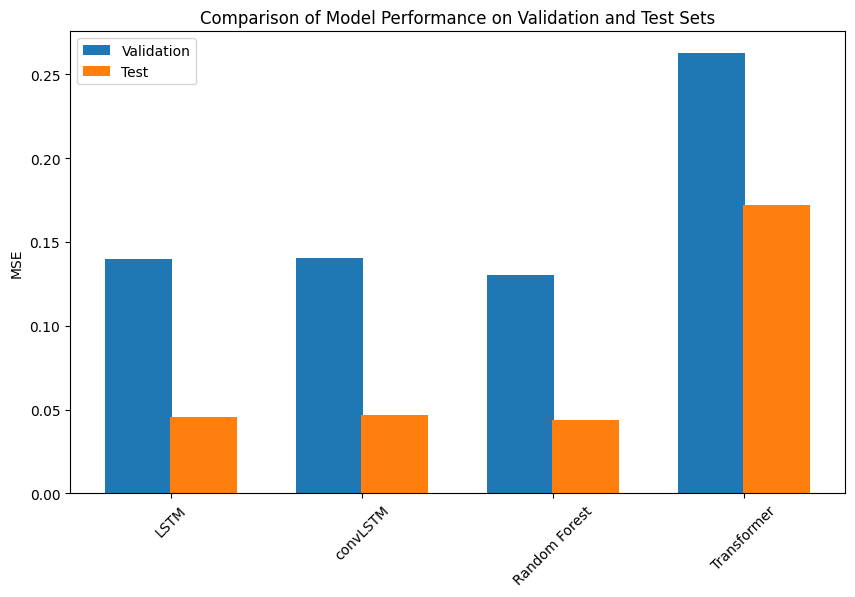

In [93]:
# Compare the Mean Squared Error (MSE) for models


# Calculate MSE for each model on validation set
rf_val_mse = mean_squared_error(y_val, rf_pred_val)
lstm_val_mse = mean_squared_error(y_val, lstm_pred_val)
convlstm_val_mse = mean_squared_error(y_val, convlstm_pred_val)
transformer_val_mse = mean_squared_error(y_val, transformer_pred_val)

# Plot bar chart
plt.figure(figsize=(6, 3))
x = np.arange(2)
width = 0.3

# Plot bar chart
plt.figure(figsize=(10, 6))
x = np.arange(4)
width = 0.35

plt.bar(x - 0.17, [rf_val_mse, lstm_val_mse, convlstm_val_mse, transformer_val_mse], width, label='Validation')
plt.bar(x + 0.17, [lstm_mse, rf_mse, convlstm_mse, transformer_mse], width, label='Test')
plt.xticks(ticks=x, labels=['LSTM' ,'convLSTM','Random Forest', 'Transformer'],
           rotation=45)
plt.ylabel('MSE')
plt.title('Comparison of Model Performance on Validation and Test Sets')
_ = plt.legend()
plt.show()



# 4. View the single and multiple steps prediction performance

## 4.1 Single prediction step

1/1 [==============================] - 0s 21ms/step


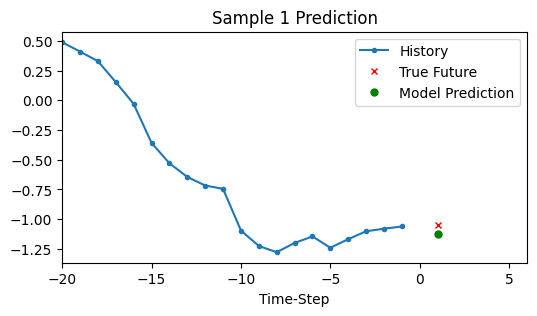

1/1 [==============================] - 0s 26ms/step


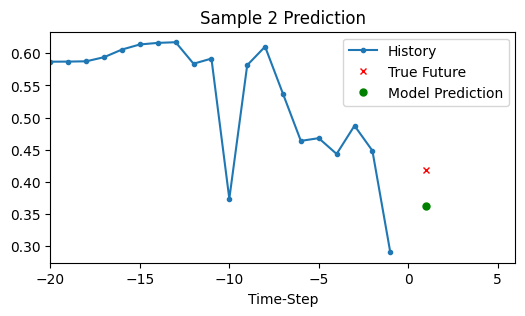

1/1 [==============================] - 0s 27ms/step


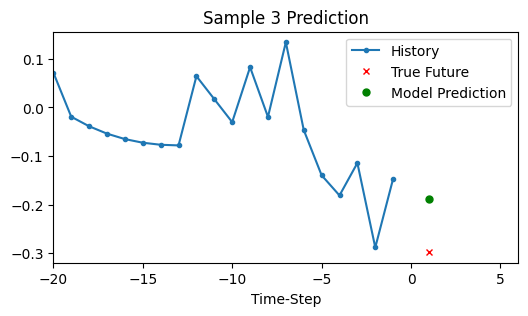

1/1 [==============================] - 0s 26ms/step


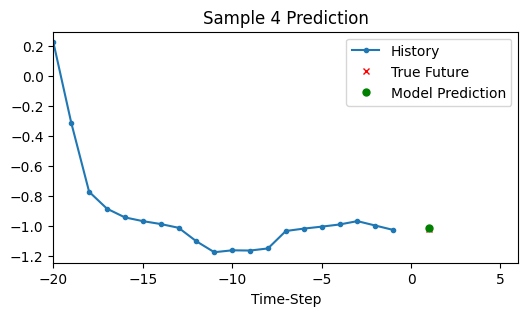

1/1 [==============================] - 0s 26ms/step


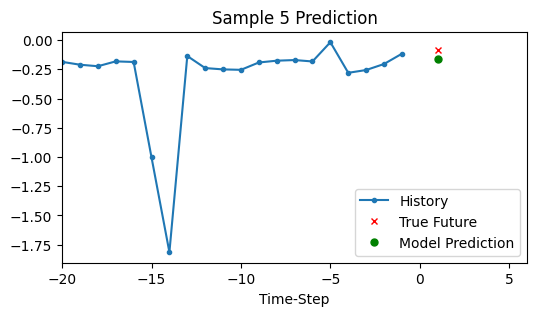

In [ ]:
# LSTM

# single step prediction
def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = 1

    fig, ax = plt.subplots(figsize=(6, 3))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 2) * 2])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 5  # number of samples to visualize
random_indices = np.random.choice(len(X_test), n, replace=False)

for i, idx in enumerate(random_indices):
    x_sample = X_test[idx]
    y_sample = y_test[idx]
    y_pred_lstm = lstm_model.predict(x_sample[np.newaxis, :, :])[0]

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_pred_lstm

    show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")


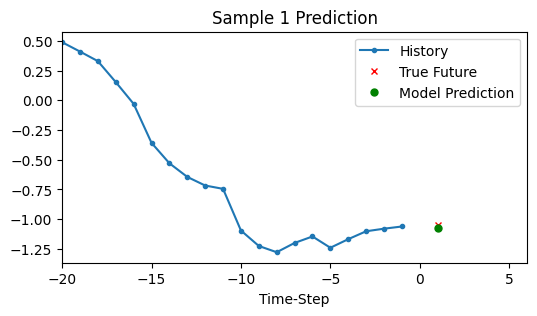

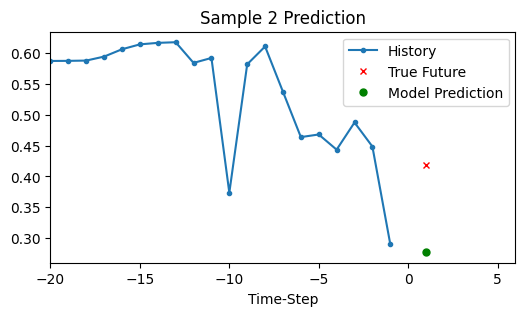

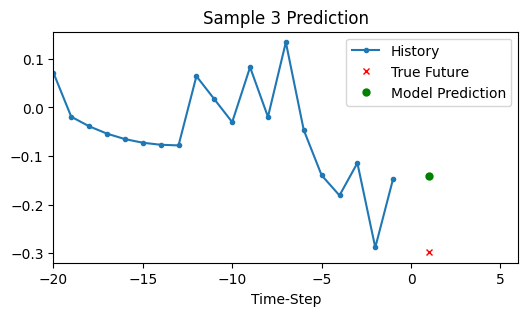

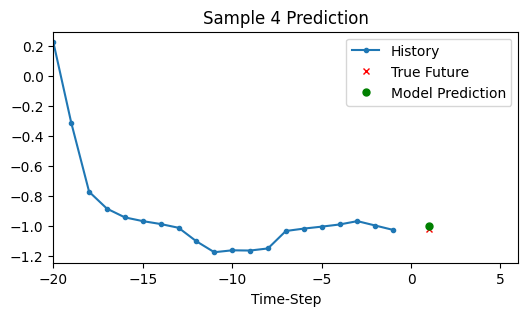

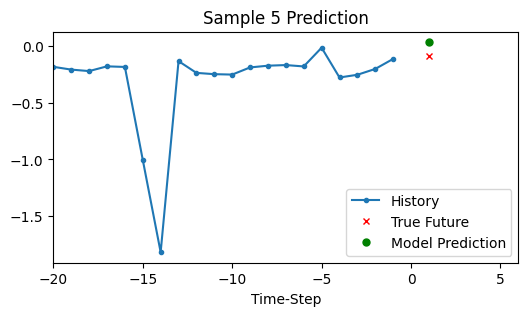

In [ ]:
# RF
#Single step prediction

for i, idx in enumerate(random_indices):
    x_sample = X_test[idx]
    y_sample = y_test[idx]
    y_pred_rf = rf_model.predict(x_sample.reshape(1, -1))[0] 

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_pred_rf

    show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")

## 4.2 Multiple prediction steps

In [ ]:
# LSTM model - radomly 10 timesteps

import random

def predict_next_steps(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input[np.newaxis, :, :]
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future[-1] + 1])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 1000  # number of samples to train on
num_future_steps = 10  # Number of future steps to predict (from 21st to 30th)

predicted_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the predicted NDVI values for all timesteps
expected_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the expected NDVI values for all timesteps

# Randomly select 5 indices from the test set for visualization
n_visualize = 5
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds = predict_next_steps(lstm_model, x_sample, num_future_steps)

    # Append the predicted NDVI values to the array
    predicted_ndvi_all[i, :] = y_preds.flatten()
    expected_ndvi_all[i, :] = y_sample.flatten()

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_preds

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
        show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")



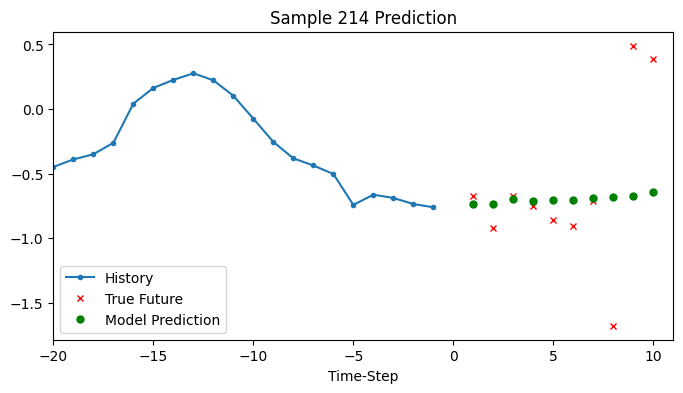

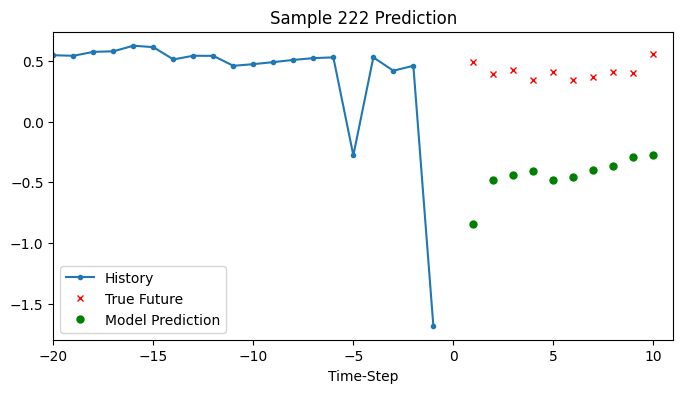

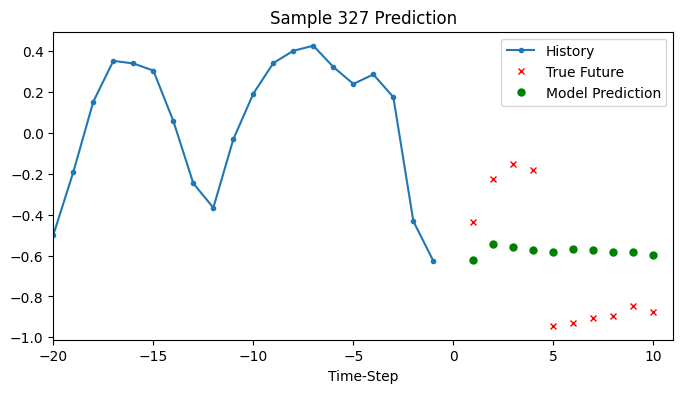

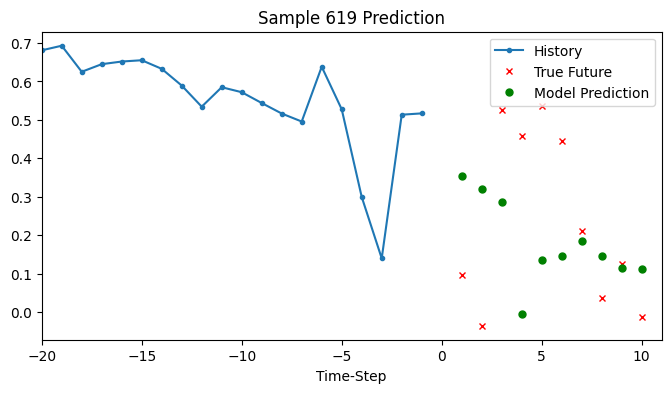

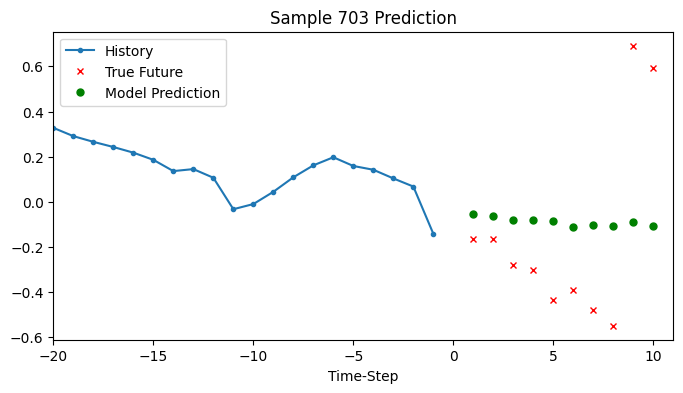

In [ ]:
# RFmodel - radomly 10 timesteps

def predict_next_steps(model, input_sequence, num_steps):
    predictions = []
    current_input = input_sequence.copy()
    for _ in range(num_steps):
        current_input_reshaped = current_input.reshape(1, -1)
        prediction = model.predict(current_input_reshaped)[0]
        predictions.append(prediction)
        current_input = np.roll(current_input, -1, axis=0)
        current_input[-1, 0] = prediction
    return np.array(predictions)

def show_plot(plot_data, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    future = np.arange(1, plot_data[1].shape[0] + 1)

    fig, ax = plt.subplots(figsize=(8, 4))
    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], future[-1] + 1])
    plt.xlabel("Time-Step")
    plt.show()

# Prepare data for the plot
n = 1000  # number of samples to train on
num_future_steps = 10  # Number of future steps to predict (from 21st to 30th)

predicted_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the predicted NDVI values for all timesteps
expected_ndvi_all = np.zeros((n, num_future_steps))  # Array to store the expected NDVI values for all timesteps

# Randomly select 5 indices from the test set for visualization
n_visualize = 5
random_indices = random.sample(range(n), n_visualize)

for i in range(n):
    x_sample = X_test[i]
    y_sample = y_test[i : i + num_future_steps]

    # Generate the 21st to 30th NDVI predictions
    y_preds = predict_next_steps(rf_model, x_sample, num_future_steps)

    # Append the predicted NDVI values to the array
    predicted_ndvi_all[i, :] = y_preds.flatten()
    expected_ndvi_all[i, :] = y_sample.flatten()

    history_ndvi = x_sample[:, 0]  # Select only NDVI_scaled from input_vars
    true_future = y_sample
    model_prediction = y_preds

    # If the current index is in the list of random indices, visualize the sample
    if i in random_indices:
        show_plot([history_ndvi, true_future, model_prediction], f"Sample {i + 1} Prediction")


## 4.3 View the prediction ability of models on different prediction timesteps

In [ ]:
#Cteate 2 dataframes for the model predicted NDVI and the correlated expected NDVI value

# Convert the NumPy arrays to pandas DataFrames
df_predicted = pd.DataFrame(data=predicted_ndvi_all, columns=["NDVI_t21", "NDVI_t22", "NDVI_t23", "NDVI_t24", "NDVI_t25", "NDVI_t26", "NDVI_t27", "NDVI_t28", "NDVI_t29", "NDVI_t30"])
df_expected = pd.DataFrame(data=expected_ndvi_all, columns=["NDVI_t21", "NDVI_t22", "NDVI_t23", "NDVI_t24", "NDVI_t25", "NDVI_t26", "NDVI_t27", "NDVI_t28", "NDVI_t29", "NDVI_t30"])

# Add index labels for each sequence
df_predicted.index = [f"Sequence {i+1}" for i in range(n)]
df_expected.index = [f"Sequence {i+1}" for i in range(n)]

# View the DataFrames
df_predicted



In [ ]:
df_expected

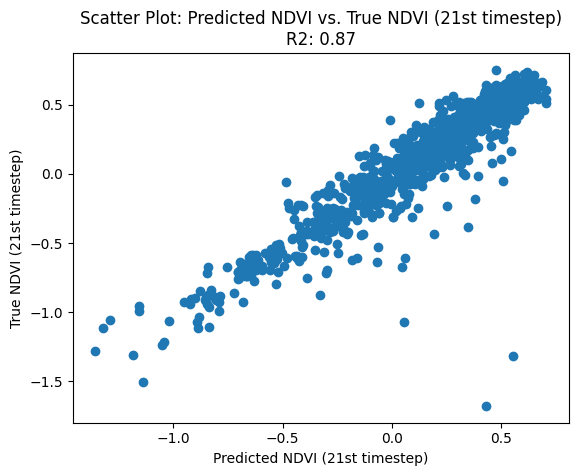

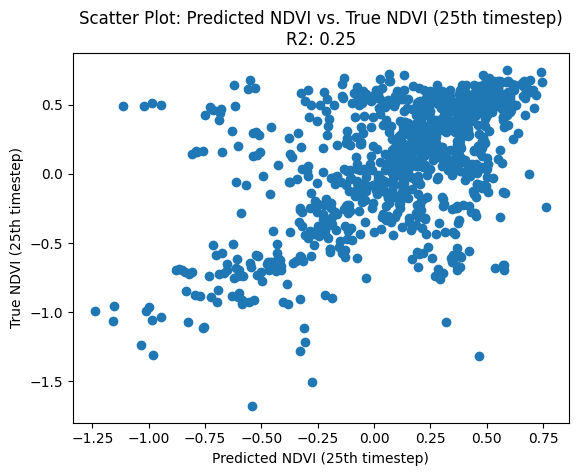

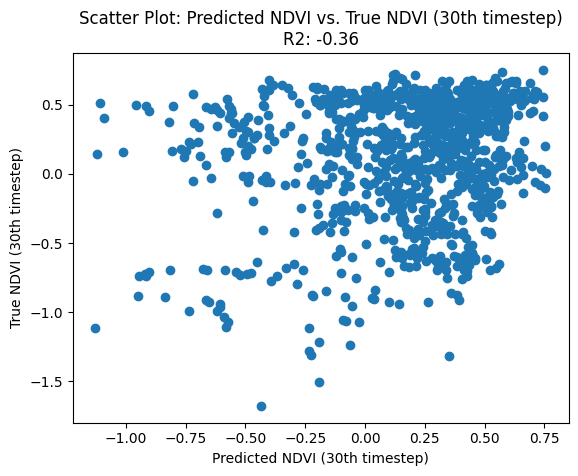

In [ ]:
# To view the correlation between predicted value and expected value in 1st, 5th and 10th timesteps

# Calculate R2 values
r2_21 = r2_score(df_expected["NDVI_t21"], df_predicted["NDVI_t21"])
r2_25 = r2_score(df_expected["NDVI_t25"], df_predicted["NDVI_t25"])
r2_30 = r2_score(df_expected["NDVI_t30"], df_predicted["NDVI_t30"])

# Plot scatter plot for timestep 21st
plt.scatter(df_predicted["NDVI_t21"], df_expected["NDVI_t21"])
plt.xlabel("Predicted NDVI (21st timestep)")
plt.ylabel("True NDVI (21st timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (21st timestep)\nR2: {:.2f}".format(r2_21))
plt.show()

# Plot scatter plot for timestep 25th
plt.scatter(df_predicted["NDVI_t25"], df_expected["NDVI_t25"])
plt.xlabel("Predicted NDVI (25th timestep)")
plt.ylabel("True NDVI (25th timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (25th timestep)\nR2: {:.2f}".format(r2_25))
plt.show()

# Plot scatter plot for timestep 30th
plt.scatter(df_predicted["NDVI_t30"], df_expected["NDVI_t30"])
plt.xlabel("Predicted NDVI (30th timestep)")
plt.ylabel("True NDVI (30th timestep)")
plt.title("Scatter Plot: Predicted NDVI vs. True NDVI (30th timestep)\nR2: {:.2f}".format(r2_30))
plt.show()


# Other models 

In [ ]:
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_test: (6760, 20, 3)
Shape of y_test: (6760,)
